<img src="https://1000logos.net/wp-content/uploads/2017/11/Zillow-Logo.png" title="Zillow Logo"/>

***

- imports that we will be using for this data set

In [1]:
# fetches the data
import acquire
# credentials file to access the data
import env
# Imports functions necessary to run visuals and hides unnecessary code
import wrangle

# coding 
import math
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

***

Fips dictionary:
- 6037.0 = Los Angeles,CA
- 6059.0 = Orange,CA
- 6111.0 = Ventura,CA

## PLAN
### 1. [Acquire Data](#Acquire:)
### Takeaways:
- Data is collected from the codeup cloud database with an appropriate SQL query.
- Data is imported using an acquire.py file.
- Original dataframe consisted of 71858 rows × 69 columns.
- Null values/ missing data are very common in about 50 percent of the data. 
 
### 2. [Prepare](#Prepare:)
### - Using [wrangle.py]()
### Takeaways:
- Before cleaning data and dropping unnecesary columns, 71858 rows × 69 columns.
- After dropping nulls and collumns, 44679 rows × 12 columns.
- resulted in 62% row retention 17% column retention.
- we continued to split the data into train, validate, and test for exploration and modeling purposes.

### 3. [Explore](#Explore:)
### Summary:
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bathroomcnt and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between calculatedfinishedsquarefeet and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bedroomcnt and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between yearbuilt and logerror.
- Based on the correlation test above fips and log error have no correlation.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between taxvaluedollarcnt and logerror.

### [Modeling](#Modeling:)

# <span style="color:blue">Acquiring Data</span>

In [2]:
# importing and aquiring data set
df = acquire.get_zillow_data()

### - Summary

In [3]:
# summary function for DataFrame
wrangle.summarize(df)

--- Shape: (71858, 69)
--- Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71858 entries, 0 to 71857
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         71858 non-null  float64
 1   parcelid                      71858 non-null  int64  
 2   storytypeid                   47 non-null     float64
 3   typeconstructiontypeid        223 non-null    float64
 4   heatingorsystemtypeid         46680 non-null  float64
 5   buildingclasstypeid           0 non-null      float64
 6   architecturalstyletypeid      207 non-null    float64
 7   airconditioningtypeid         23069 non-null  float64
 8   id                            71858 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   71858 non-null  float64
 11  bedroomcnt                    71858 non-null  float64
 12  buildingqualitytypeid      

nulls by row: n_missing  percent_missing
23         0.333333               2
24         0.347826              13
25         0.362319              24
26         0.376812              66
27         0.391304             312
28         0.405797             453
29         0.420290            5161
30         0.434783            3242
31         0.449275            9185
32         0.463768           11699
33         0.478261           14057
34         0.492754           12672
35         0.507246            4015
36         0.521739            5107
37         0.536232            3387
38         0.550725            1892
39         0.565217             240
40         0.579710             172
41         0.594203              13
42         0.608696               9
43         0.623188              13
44         0.637681              71
45         0.652174              45
46         0.666667               4
47         0.681159               2
48         0.695652               2
dtype: int64
None None 

***

# <span style="color:blue">Prepare:</span>
- all these functions will be found in the explore.py file

###  What percentage of data is missing per column?

In [4]:
#looking at percentage of null values by column
wrangle.nulls_by_columns(df).sort_values(by= 'percent', ascending=False)

,count,percent
buildingclasstypeid,71858,1.000000
buildingclassdesc,71858,1.000000
finishedsquarefeet13,71856,0.999972
finishedsquarefeet15,71847,0.999847
storydesc,71811,0.999346
basementsqft,71811,0.999346
storytypeid,71811,0.999346
yardbuildingsqft26,71788,0.999026
finishedsquarefeet6,71692,0.997690
fireplaceflag,71686,0.997606


### Takeaways:

- we can see that there is a large percentage of information missing in alot of the columns (ranging from column regionidneighborhood with %60 data missing to buildingclasstypeid with %100 of the data missing.

### Functions to clean data:

- lets build a function to address the columns with large percentage of missing data.

In [5]:
# range of out liers 1.5 is recomended 
k = 1.5
#creating a cols value of columns that we want for the outliers to be handled
cols = ['bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet','yearbuilt','lotsizesquarefeet']    

def handle_outliers(df, cols, k):
    """this will eliminate most outliers, use a 1.5 k value if unsure because it is the most common, make sure to define cols value as the features
    you want the outliers to be handled. this should be done before running the function and outiside of it"""

    
    # Create placeholder dictionary for each columns bounds
    bounds_dict = {}
   
    for col in cols:
        # get necessary iqr values
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr

        #store values in a dictionary referencable by the column name
        #and specific bound
        bounds_dict[col] = {}
        bounds_dict[col]['upper_bound'] = upper_bound
        bounds_dict[col]['lower_bound'] = lower_bound

    for col in cols:
        #retrieve bounds
        col_upper_bound = bounds_dict[col]['upper_bound']
        col_lower_bound = bounds_dict[col]['lower_bound']

        #remove rows with an outlier in that column
        df = df[(df[col] < col_upper_bound) & (df[col] > col_lower_bound)]
        
    return df
df = handle_outliers(df, cols, k)
df

,propertylandusetypeid,parcelid,storytypeid,typeconstructiontypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,typeconstructiondesc,storydesc,propertylandusedesc
0,261.0,14297519,NaN,NaN,NaN,NaN,NaN,NaN,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
1,261.0,17052889,NaN,NaN,NaN,NaN,NaN,NaN,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
2,261.0,14186244,NaN,NaN,NaN,NaN,NaN,NaN,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
3,261.0,12177905,NaN,NaN,2.0,NaN,NaN,NaN,2288172,NaN,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,NaN,NaN,Single Family Residential
5,266.0,17143294,NaN,NaN,NaN,NaN,NaN,NaN,1447245,NaN,...,5,-0.020526,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71851,261.0,12412492,NaN,NaN,2.0,NaN,NaN,NaN,2274245,NaN,...,77607,0.001082,2017-09-19,NaN,NaN,NaN,Central,NaN,NaN,Single Family Residential
71854,261.0,17239384,NaN,NaN,NaN,NaN,NaN,NaN,2968375,NaN,...,77610,0.013209,2017-09-21,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
71855,261.0,12773139,NaN,NaN,2.0,NaN,NaN,1.0,1843709,NaN,...,77611,0.037129,2017-09-21,Central,NaN,NaN,Central,NaN,NaN,Single Family Residential
71856,261.0,12826780,NaN,NaN,2.0,NaN,NaN,NaN,1187175,NaN,...,77612,0.007204,2017-09-25,NaN,NaN,NaN,Central,NaN,NaN,Single Family Residential


## Takeaways
- Before dropping nulls, we had (71858 rows, 69 cols).
- After dropping nulls, we ended with (43964 rows × 69 columns).

### Lets see what were left with

In [6]:
# a view a how many null values exist in each column
wrangle.nulls_by_columns(df).sort_values(by= 'percent', ascending=False)

,count,percent
buildingclassdesc,49964,1.000000
buildingclasstypeid,49964,1.000000
finishedsquarefeet15,49964,1.000000
finishedsquarefeet13,49963,0.999980
basementsqft,49938,0.999480
storydesc,49938,0.999480
storytypeid,49938,0.999480
yardbuildingsqft26,49921,0.999139
architecturalstyletypeid,49896,0.998639
architecturalstyledesc,49896,0.998639


### Lets adress the rest of the  null values

### columns to remove:(column, reason for removal)
removing 
- (id, id.1, parcelid,'propertylandusetypeid','buildingqualitytypeid'), id is not necessary for our algorithms and will confuse any models from here on forward.
- (fullbathcnt,calculatedbathnbr,roomcnt),  any room room count other the bedroomcnt or bathroomcnt is not necessary considering that they return similar information if not combined info.
- (propertyzoningdesc,rawcensustractandblock,regionidcounty,censustractandblock), considering that fips is being kept for region identification purposes, these columns are not necessary.
- (assessmentyear, landtaxvaluedollarcnt, taxamount, transactiondate), considering that we have already filtered out the data to only return back information for the year 2017, and are keeping taxvaluedollarcnt, these columns are not necessary because this information can be obtained through the data that we will be keeping.
- (heatingorsystemdesc,finishedsquarefeet12,propertylandusedesc,'propertycountylandusecode','unitcnt'), calculatedfinishedsquarefeet already covers this info and heatingorsystemid already identifies this information numerically.

In [11]:
def drop_columns(df):
    """ using this function to drop columns that i wont be using for exploration stage of this project"""
    # drop function to remove columns
    df = df.drop(columns=['heatingorsystemtypeid','buildingqualitytypeid','id','parcelid','calculatedbathnbr','propertylandusetypeid','fullbathcnt','propertyzoningdesc','rawcensustractandblock','regionidcounty',
    'roomcnt','structuretaxvaluedollarcnt','assessmentyear','landtaxvaluedollarcnt','taxamount','censustractandblock',
    'id.1','transactiondate','heatingorsystemdesc','finishedsquarefeet12','propertylandusedesc','propertycountylandusecode','unitcnt'])
    return df


def split(df):
    """ using this funciton to split data into train, validate, & test in order to explore, model and test data."""
    train_and_validate, test = train_test_split(df, random_state=13, test_size=.15)
    train, validate = train_test_split(train_and_validate, random_state=13, test_size=.2)

    print('Train: %d rows, %d cols' % train.shape)
    print('Validate: %d rows, %d cols' % validate.shape)
    print('Test: %d rows, %d cols' % test.shape)
    
    return train, validate, test    

def handle_missing_values(df, prop_required_column, prop_required_row):
    """this piece of code allows us to handle the missing data and get rid of it, both in the columns and in the rows(so that we can analize better)."""
    print ('Before dropping nulls, %d rows, %d cols' % df.shape)
    n_required_column = round(df.shape[0] * prop_required_column)
    n_required_row = round(df.shape[1] * prop_required_row)
    # drops based on percentage missing in row
    df = df.dropna(axis=0, thresh=n_required_row)
    #drops na based on percentage missing in collumn
    df = df.dropna(axis=1, thresh=n_required_column)
    #drops na values in colums
    df = drop_columns(df)
    #dropping.
    df = df.dropna()
    print('After dropping nulls. %d rows. %d cols' % df.shape)
    return df

def get_exploration_data(df):
    #drops rows and columns with more than %50 data missing
    print('Before dropping nulls, %d rows, %d cols' % df.shape)
    # calls on function from above and we give it a no .5 value to drop na with over %50 data missing
    df = handle_missing_values(df, prop_required_column=.5, prop_required_row=.5)
    print('After dropping nulls, %d rows, %d cols' % df.shape)
    return df
#calling the function 
df = get_exploration_data(df)

Before dropping nulls, 49964 rows, 69 cols
Before dropping nulls, 49964 rows, 69 cols
After dropping nulls. 44092 rows. 12 cols
After dropping nulls, 44092 rows, 12 cols


In [12]:
# a view a how many null values exist in each column
wrangle.nulls_by_columns(df).sort_values(by= 'percent', ascending=False)

,count,percent
bathroomcnt,0,0.0
bedroomcnt,0,0.0
calculatedfinishedsquarefeet,0,0.0
fips,0,0.0
latitude,0,0.0
longitude,0,0.0
lotsizesquarefeet,0,0.0
regionidcity,0,0.0
regionidzip,0,0.0
yearbuilt,0,0.0


# Clustering

### How many clusters should we make?

In [13]:
# building and X to start clustering
X = df[['bathroomcnt', 'calculatedfinishedsquarefeet','bedroomcnt','yearbuilt','taxvaluedollarcnt']]

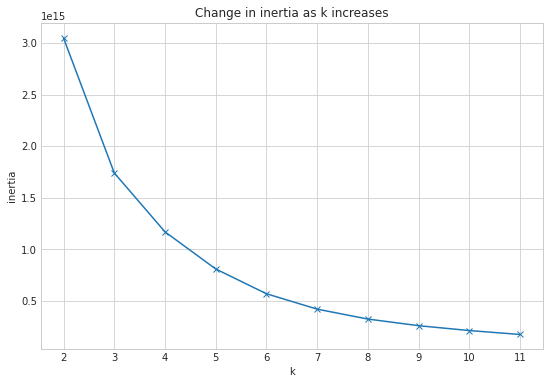

In [14]:
# visualizing drop to estimate what number of clusters work best for the model
with plt.style.context('seaborn-whitegrid'):
    #graph size
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


### Takeways:
- 3 point inertia drop from 2-3
- 1 point inertia drop from 3-4

### Conclusion:
- we will create 3 clusters

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [16]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,bathroomcnt,calculatedfinishedsquarefeet,bedroomcnt,yearbuilt,taxvaluedollarcnt
0,1.926008,1492.095891,3.018232,1959.377635,2.308833e+05
1,2.395536,1950.981688,3.305265,1965.893073,6.678976e+05
2,2.784030,2355.228137,3.344487,1957.488973,1.841735e+06


In [17]:
df['cluster'] = kmeans.predict(X)


In [19]:
df.groupby('cluster')['bathroomcnt', 'calculatedfinishedsquarefeet','bedroomcnt','yearbuilt','taxvaluedollarcnt'].mean()


,bathroomcnt,calculatedfinishedsquarefeet,bedroomcnt,yearbuilt,taxvaluedollarcnt
cluster,,,,,
0,1.926197,1492.212833,3.018421,1959.382319,2.310852e+05
1,2.396146,1951.638889,3.305408,1965.899131,6.683758e+05
2,2.783486,2355.577626,3.344749,1957.449772,1.842182e+06


In [20]:
df

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
1,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,97099.0,1967.0,464000.0,0.055619,1
2,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,97078.0,1962.0,564778.0,0.005383,1
3,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,96330.0,1970.0,145143.0,-0.103410,0
5,2.0,3.0,1492.0,6111.0,34230044.0,-118993991.0,903.0,51239.0,97091.0,1982.0,331064.0,-0.020526,0
7,1.0,2.0,738.0,6037.0,34149214.0,-118239357.0,4214.0,45457.0,96325.0,1922.0,218552.0,0.101723,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71851,2.0,4.0,1633.0,6037.0,33870815.0,-118070858.0,4630.0,30267.0,96204.0,1962.0,346534.0,0.001082,0
71854,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,27110.0,97116.0,1964.0,67205.0,0.013209,0
71855,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,36502.0,96480.0,1954.0,49546.0,0.037129,0
71856,2.0,3.0,1762.0,6037.0,33937685.0,-117996709.0,6347.0,14634.0,96171.0,1955.0,522000.0,0.007204,1


Text(0.5, 1.0, 'Visualizing Cluster Centers')

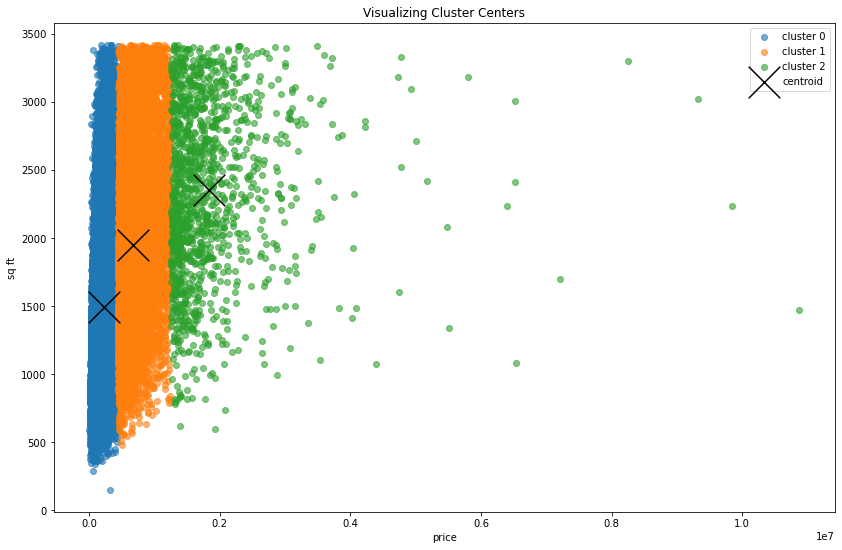

In [22]:
#graph size 
plt.figure(figsize=(14, 9))
#graphing after weve clustered using a scatter plot
for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.taxvaluedollarcnt, subset.calculatedfinishedsquarefeet, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='calculatedfinishedsquarefeet', x='taxvaluedollarcnt', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('price')
plt.ylabel('sq ft')
plt.title('Visualizing Cluster Centers')


In [23]:
# look at the first 5 rows of our new dataframe, transposed
centroids.head().T

,0,1,2
bathroomcnt,1.926008,2.395536,2.784030e+00
calculatedfinishedsquarefeet,1492.095891,1950.981688,2.355228e+03
bedroomcnt,3.018232,3.305265,3.344487e+00
yearbuilt,1959.377635,1965.893073,1.957489e+03
taxvaluedollarcnt,230883.291511,667897.645904,1.841735e+06


In [29]:
# seperating our data into clusters
cluster1 =df[df.cluster == 0]
cluster1

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
3,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,96330.0,1970.0,145143.0,-0.103410,0
5,2.0,3.0,1492.0,6111.0,34230044.0,-118993991.0,903.0,51239.0,97091.0,1982.0,331064.0,-0.020526,0
7,1.0,2.0,738.0,6037.0,34149214.0,-118239357.0,4214.0,45457.0,96325.0,1922.0,218552.0,0.101723,0
8,3.0,4.0,3039.0,6037.0,33960230.0,-118006914.0,20028.0,14634.0,96173.0,1970.0,220583.0,-0.040966,0
10,3.0,4.0,2540.0,6037.0,34434971.0,-118464390.0,10384.0,54311.0,96374.0,1999.0,430108.0,0.005963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71850,2.0,3.0,1570.0,6037.0,34194943.0,-118629218.0,7499.0,12447.0,96342.0,1958.0,72026.0,0.081196,0
71851,2.0,4.0,1633.0,6037.0,33870815.0,-118070858.0,4630.0,30267.0,96204.0,1962.0,346534.0,0.001082,0
71854,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,27110.0,97116.0,1964.0,67205.0,0.013209,0
71855,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,36502.0,96480.0,1954.0,49546.0,0.037129,0


In [30]:
# seperating our data into clusters
cluster2 = df[df.cluster == 1]
cluster2

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
1,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,97099.0,1967.0,464000.0,0.055619,1
2,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,97078.0,1962.0,564778.0,0.005383,1
15,2.0,4.0,1677.0,6059.0,33642800.0,-117707211.0,5304.0,32380.0,96962.0,1981.0,528847.0,-0.021896,1
20,2.5,3.0,2074.0,6059.0,33586693.0,-117697202.0,5600.0,25458.0,96971.0,1978.0,597213.0,-0.006653,1
21,2.5,3.0,2018.0,6059.0,33728985.0,-117754647.0,2800.0,52650.0,96954.0,1998.0,534612.0,0.044309,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71820,3.0,4.0,2180.0,6037.0,33885900.0,-118373000.0,7509.0,33612.0,96124.0,1973.0,797109.0,0.064191,1
71821,2.0,4.0,1689.0,6037.0,34106193.0,-117830253.0,8028.0,33836.0,96513.0,1978.0,574000.0,-0.016622,1
71832,3.0,3.0,1774.0,6037.0,34158519.0,-118451574.0,5834.0,12447.0,96412.0,1949.0,796324.0,0.002138,1
71843,2.0,3.0,1472.0,6037.0,34123355.0,-118180658.0,4454.0,12447.0,96023.0,1927.0,603333.0,-0.062404,1


In [31]:
# seperating our data into clusters
cluster3 = df[df.cluster == 2]
cluster3

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
96,2.5,3.0,3011.0,6059.0,33628725.0,-117873172.0,6944.0,53571.0,96978.0,1973.0,1441252.0,-0.201121,2
132,3.0,4.0,3107.0,6037.0,34154597.0,-118514596.0,17166.0,12447.0,96349.0,1957.0,1279125.0,-0.013062,2
168,2.5,3.0,2134.0,6059.0,33624386.0,-117919255.0,6375.0,53571.0,96981.0,1995.0,1794000.0,0.048630,2
268,2.0,3.0,1956.0,6037.0,34040419.0,-118480389.0,8008.0,26964.0,96150.0,1927.0,2715793.0,-0.088941,2
277,3.0,4.0,2409.0,6037.0,34038659.0,-118498682.0,7521.0,26964.0,96149.0,1927.0,2100270.0,-0.206738,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71745,3.0,3.0,1687.0,6037.0,34053344.0,-118474937.0,6999.0,12447.0,96030.0,1947.0,2000000.0,0.075964,2
71752,2.0,3.0,2240.0,6037.0,34030263.0,-118838416.0,9533.0,12520.0,96116.0,1977.0,1582000.0,0.073576,2
71779,3.0,4.0,3148.0,6037.0,33891606.0,-118389223.0,7001.0,19177.0,96117.0,1993.0,2082201.0,0.035489,2
71807,2.0,3.0,1467.0,6037.0,33899557.0,-118399615.0,4643.0,19177.0,96117.0,1951.0,1629476.0,0.028893,2


# <span style="color:blue">Split Data:</span>

In [33]:
# get train to expolore 
train, validate, test = wrangle.split(cluster1)
# seeing what the train split dataset
train.info()

Train: 19860 rows, 13 cols
Validate: 4965 rows, 13 cols
Test: 4381 rows, 13 cols
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19860 entries, 63024 to 7440
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   19860 non-null  float64
 1   bedroomcnt                    19860 non-null  float64
 2   calculatedfinishedsquarefeet  19860 non-null  float64
 3   fips                          19860 non-null  float64
 4   latitude                      19860 non-null  float64
 5   longitude                     19860 non-null  float64
 6   lotsizesquarefeet             19860 non-null  float64
 7   regionidcity                  19860 non-null  float64
 8   regionidzip                   19860 non-null  float64
 9   yearbuilt                     19860 non-null  float64
 10  taxvaluedollarcnt             19860 non-null  float64
 11  logerror                      19860

***

In [35]:
#train sample
train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
63024,2.0,3.0,1210.0,6037.0,33946806.0,-118021981.0,7271.0,118225.0,96172.0,1951.0,197586.0,0.040959,0
25147,2.0,2.0,1298.0,6037.0,33823952.0,-118123832.0,5518.0,46298.0,96242.0,1949.0,73472.0,0.009401,0
28277,2.0,2.0,1103.0,6037.0,34586476.0,-118122476.0,8123.0,40227.0,97328.0,1955.0,145000.0,0.029121,0
8633,1.0,3.0,1048.0,6037.0,33839333.0,-118069570.0,5408.0,12292.0,96215.0,1958.0,154143.0,-0.027664,0
45688,1.0,2.0,1010.0,6037.0,33912079.0,-118187318.0,5384.0,32616.0,96113.0,1941.0,217557.0,0.046774,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34181,2.0,3.0,1579.0,6111.0,34352398.0,-119076961.0,9000.0,26965.0,97113.0,1963.0,84803.0,0.028852,0
32501,1.0,2.0,829.0,6037.0,33890570.0,-118080916.0,2501.0,53636.0,96193.0,1956.0,255000.0,-0.050364,0
49231,1.0,1.0,644.0,6037.0,33851569.0,-118189721.0,2242.0,46298.0,96239.0,1929.0,238551.0,-0.202643,0
50551,2.0,4.0,1125.0,6037.0,33904932.0,-118031498.0,6356.0,5465.0,96190.0,1956.0,292207.0,-0.024320,0


In [36]:
#validate sample
validate

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
26535,3.0,4.0,2600.0,6111.0,34240361.0,-119034361.0,7453.0,51239.0,97089.0,1976.0,392089.0,0.381537,0
10718,3.0,2.0,1060.0,6037.0,34149600.0,-118263000.0,13856.0,45457.0,96322.0,2005.0,303030.0,-0.004318,0
22330,3.0,3.0,1843.0,6037.0,33796850.0,-118200503.0,3475.0,46298.0,96240.0,1983.0,407928.0,0.030854,0
2128,1.0,2.0,896.0,6037.0,34083854.0,-118213327.0,3852.0,12447.0,96012.0,1909.0,25837.0,0.047054,0
45035,2.0,3.0,1870.0,6037.0,34236857.0,-118496579.0,7500.0,12447.0,96369.0,1956.0,76582.0,0.000734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7385,2.5,3.0,1665.0,6059.0,33814709.0,-117839569.0,8892.0,33252.0,97065.0,1962.0,71906.0,0.011841,0
23466,1.0,1.0,888.0,6037.0,33773600.0,-118195000.0,15002.0,46298.0,96236.0,1961.0,146102.0,0.081227,0
46164,3.0,3.0,2132.0,6059.0,33826711.0,-117974036.0,10153.0,16764.0,97023.0,1960.0,102476.0,0.011445,0
23623,1.0,2.0,1338.0,6037.0,34004339.0,-118305516.0,5902.0,12447.0,96043.0,1914.0,281384.0,0.042945,0


In [37]:
# test sample
test

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
70098,2.0,3.0,1263.0,6037.0,33834028.0,-118284849.0,8989.0,10723.0,96229.0,1950.0,98167.0,-0.141301,0
71171,2.0,2.0,1176.0,6037.0,33764500.0,-118159000.0,6714.0,46298.0,96237.0,1971.0,245687.0,0.017233,0
48015,1.0,3.0,966.0,6037.0,33911433.0,-118203414.0,7193.0,24174.0,96091.0,1947.0,319000.0,-0.152170,0
9783,3.0,4.0,2444.0,6037.0,34062140.0,-118145174.0,11234.0,50677.0,96533.0,1950.0,135336.0,-0.055282,0
68191,1.0,2.0,500.0,6111.0,34418319.0,-118789971.0,5200.0,13311.0,97108.0,1939.0,9242.0,0.095752,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8039,1.0,2.0,820.0,6037.0,33910361.0,-118234747.0,7333.0,24174.0,96092.0,1946.0,25417.0,-0.156557,0
19224,3.0,3.0,1450.0,6037.0,34473748.0,-118532654.0,5235.0,54311.0,96403.0,1988.0,436556.0,0.002202,0
6855,2.0,3.0,1783.0,6037.0,34006915.0,-118344854.0,9008.0,12447.0,95989.0,1955.0,89219.0,-0.030367,0
46905,1.0,2.0,802.0,6037.0,33994542.0,-118064918.0,5023.0,14634.0,96174.0,1941.0,242066.0,-0.073418,0


---

***

# <span style="color:blue">Explore:</span>

###  ? Does logerror differ across bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, yearbuilt, & taxvaluedollarcnt ?

In [38]:
#train info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19860 entries, 63024 to 7440
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   19860 non-null  float64
 1   bedroomcnt                    19860 non-null  float64
 2   calculatedfinishedsquarefeet  19860 non-null  float64
 3   fips                          19860 non-null  float64
 4   latitude                      19860 non-null  float64
 5   longitude                     19860 non-null  float64
 6   lotsizesquarefeet             19860 non-null  float64
 7   regionidcity                  19860 non-null  float64
 8   regionidzip                   19860 non-null  float64
 9   yearbuilt                     19860 non-null  float64
 10  taxvaluedollarcnt             19860 non-null  float64
 11  logerror                      19860 non-null  float64
 12  cluster                       19860 non-null  int32  
dty

In [39]:
# columns in train
train.columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips',
       'latitude', 'longitude', 'lotsizesquarefeet', 'regionidcity',
       'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'logerror', 'cluster'],
      dtype='object')

In [40]:
cols_features = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxvaluedollarcnt', 'fips']
target_variable = ['logerror']

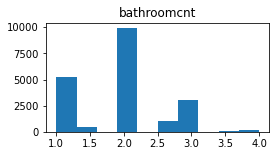

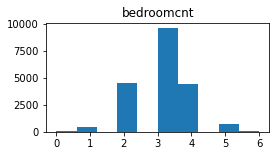

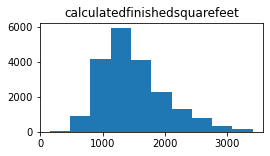

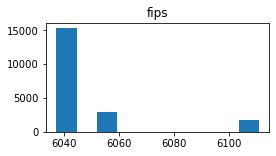

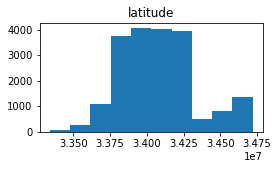

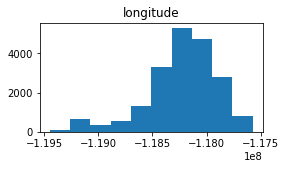

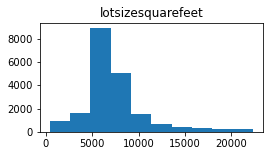

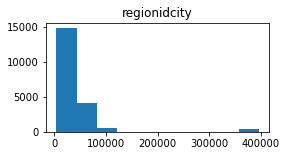

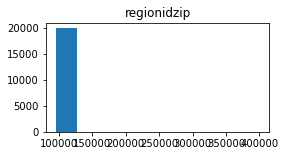

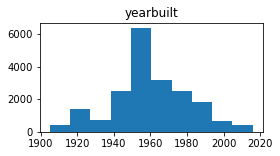

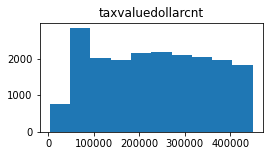

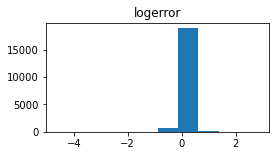

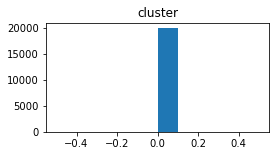

In [41]:
# graphing each colum seperately
for col in train.columns:
    #graph size
    plt.figure(figsize=(4,2))
    #histogram graph
    plt.hist(train[col])
    #title of column
    plt.title(col)
    # show graph
    plt.show()

### Takeaways:
- logerror, yearbuilt, calculatedsquarefeet, bedroom and bathroom tend to have a skew to the right.
- using this info we will run a simple correlation test.

---

***
### Is there a correlation between bathroomcnt & logerror ?
- Null Hypothesis  = there is no correlation between the bathroomcnt of a home and logerror

- Alternative Hypothesis  = there is a correlation between the bathroomcnt of a home and logerror

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

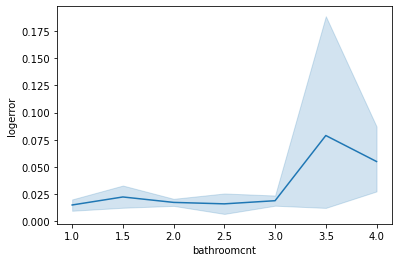

In [42]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'bathroomcnt' ,y="logerror")

Is there a relationship
between bathroomcnt and logerror?


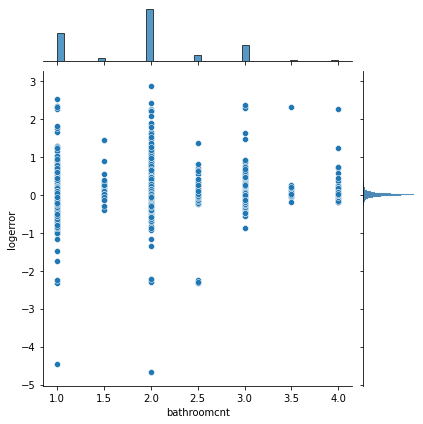

In [43]:
print("Is there a relationship\nbetween bathroomcnt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="bathroomcnt", y="logerror", data=train)
# x label
plt.xlabel("bathroomcnt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [44]:
#set the alpha to .05
alpha = .05
# corralation test between bathroomcnt and logerror
corr, p = stats.pearsonr(train.bathroomcnt, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.015402658194285811 , p value: 0.02995993763714321
Pvalue is: 0.02995993763714321 is less than alpha: 0.05
Reject the null hypothesis because there is a correlation present


### Takeaways:
- Based on the line graph above we can see that the range of log error increases when the bathroomcnt is more then 3 bathroomcnt.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bathroomcnt and logerror. 

---

***
### Is there a correlation between calculatedfinishedsquarefeet & logerror ?
- Null Hypothesis  = there is no correlation between the calculatedfinishedsquarefeet of a home and logerror

- Alternative Hypothesis  = there is a correlation between the calculatedfinishedsquarefeet of a home and logerror

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

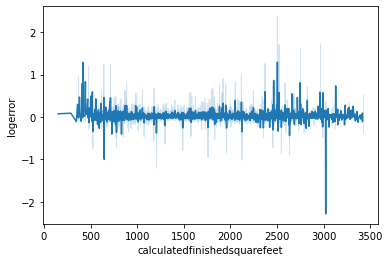

In [45]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'calculatedfinishedsquarefeet' ,y="logerror")

Is there a relationship
between calculatedfinishedsquarefeet and logerror?


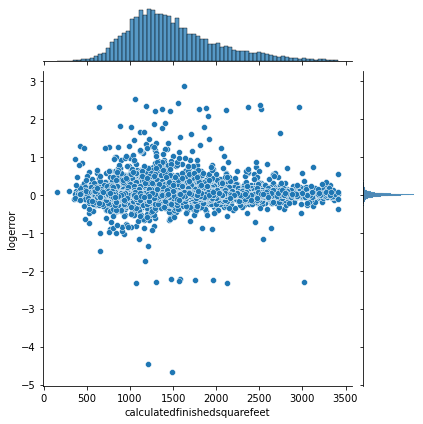

In [46]:
print("Is there a relationship\nbetween calculatedfinishedsquarefeet and logerror?")
# graph correlation using jointplot
sns.jointplot(x="calculatedfinishedsquarefeet", y="logerror", data=train)
# x label
plt.xlabel("calculatedfinishedsquarefeet")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [47]:
#set the alpha to .05
alpha = .05
# corralation test between calculatedfinishedsquarefeet and logerror
corr, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.009034734118884093 , p value: 0.20295759034925298
Pvalue is: 0.20295759034925298 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- From the line graph above we can see that the range of log error increases when the calculatedfinishedsquarefeet is less than 1000 and greater then 2800 roughly.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between calculatedfinishedsquarefeet and logerror. 

---

***
### Is there a correlation between bedroomcnt & logerror ?
- Null Hypothesis  = there is no correlation between the bedroomcnt  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the bedroomcnt  of a home and logerror

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

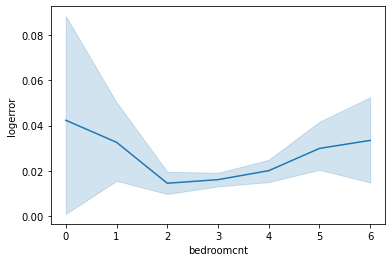

In [48]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'bedroomcnt' ,y="logerror")

Is there a relationship
between bedroomcnt and logerror?


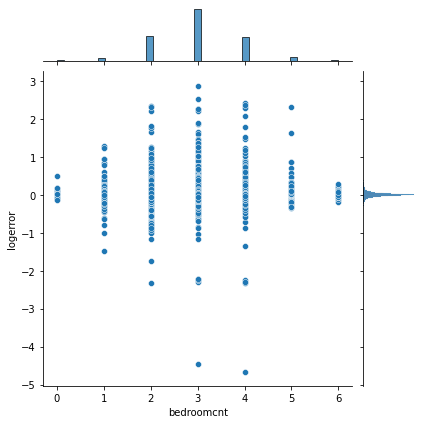

In [49]:
print("Is there a relationship\nbetween bedroomcnt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="bedroomcnt", y="logerror", data=train)
# x label
plt.xlabel("bedroom cnt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [50]:
#set the alpha to .05
alpha = .05
# corralation test between bedroomcnt and logerror
corr, p = stats.pearsonr(train.bedroomcnt, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.010271280004638596 , p value: 0.14777583861601404
Pvalue is: 0.14777583861601404 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- Based on the line graph above we can see that the range of log error increases when the bedroomcnt is less than 2 and greater 5.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bedroomcnt and logerror. 

---

---
### Is there a correlation between yearbuilt & logerror ?
- Null Hypothesis  = there is no correlation between the yearbuilt  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the yearbuilt  of a home and logerror

<AxesSubplot:xlabel='yearbuilt', ylabel='logerror'>

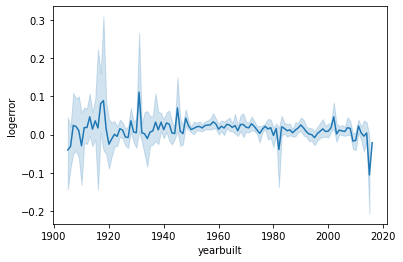

In [51]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'yearbuilt' ,y="logerror")

Is there a relationship
between yearbuilt and logerror?


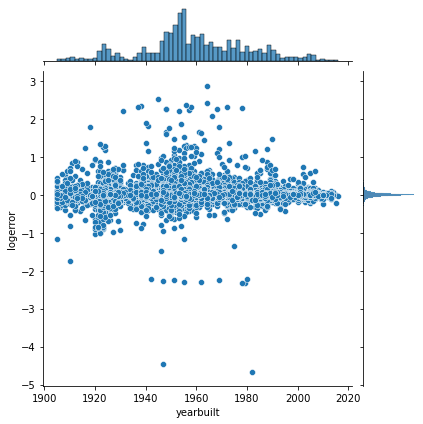

In [52]:
print("Is there a relationship\nbetween yearbuilt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="yearbuilt", y="logerror", data=train)
# x label
plt.xlabel("yearbuilt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [53]:
#set the alpha to .05
alpha = .05
# corralation test with sq ft yearbuilt and logerror
corr, p = stats.pearsonr(train.yearbuilt, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: -0.0017735081537482477 , p value: 0.8026515282939681
Pvalue is: 0.8026515282939681 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- Based on the line graph above we can see that the range of log error increases when the yearbuilt is before 1940s.
- After running a corralation test We fail to reject the null hypothesis because there is no significant correlation present. 

---

***
### Is there a correlation between fips & logerror ?
- Null Hypothesis  = there is no correlation between the fips  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the fips  of a home and logerror

<AxesSubplot:xlabel='fips', ylabel='logerror'>

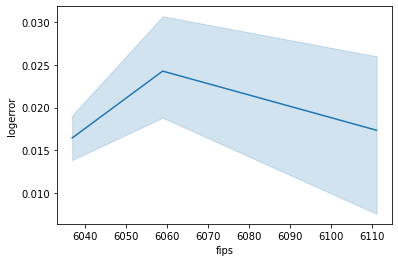

In [54]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'fips' ,y="logerror")

Is there a relationship
between fips and logerror?


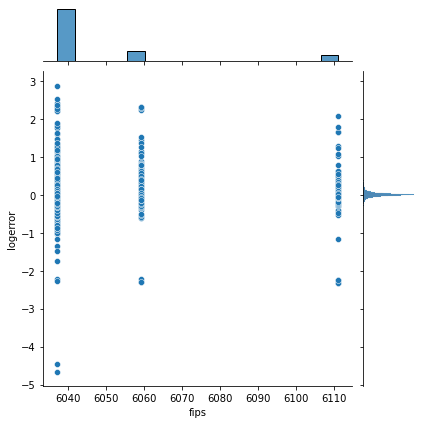

In [55]:
print("Is there a relationship\nbetween fips and logerror?")
# graph correlation using jointplot
sns.jointplot(x="fips", y="logerror", data=train)
# x label
plt.xlabel("fips")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [56]:
#set the alpha to .05
alpha = .05
# corralation fips and logerror
corr, p = stats.pearsonr(train.fips, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.005538270510256305 , p value: 0.4351316560085525
Pvalue is: 0.4351316560085525 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- Based on the correlation test above fips and log error have no correlation.

***

***
### Is there a correlation between taxvaluedollarcnt & logerror ?
- Null Hypothesis  = there is no correlation between the taxvaluedollarcnt  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the taxvaluedollarcnt  of a home and logerror

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

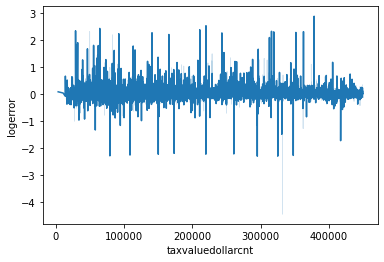

In [57]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'taxvaluedollarcnt' ,y="logerror")

Is there a relationship
between taxvaluedollarcnt and logerror?


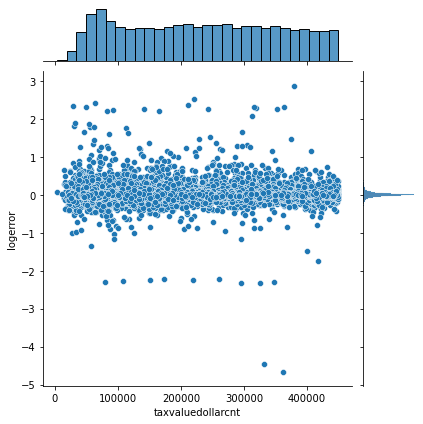

In [58]:
print("Is there a relationship\nbetween taxvaluedollarcnt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="taxvaluedollarcnt", y="logerror", data=train)
# x label
plt.xlabel("taxvaluedollarcnt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [59]:
#set the alpha to .05
alpha = .05
# corralation taxvaluedollarcnt and logerror
corr, p = stats.pearsonr(train.taxvaluedollarcnt, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: -0.036335593533410114 , p value: 3.0234221337992024e-07
Pvalue is: 3.0234221337992024e-07 is less than alpha: 0.05
Reject the null hypothesis because there is a correlation present


### Takeaways:
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between taxvaluedollarcnt and logerror. 
***

## Exploration Summary for Cluster 1
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bathroomcnt and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between calculatedfinishedsquarefeet and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bedroomcnt and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between yearbuilt and logerror.
- Based on the correlation test above fips and log error have no correlation.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between taxvaluedollarcnt and logerror.

---

# Modeling:

In [62]:
# looking at the head info for train data set
train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
63024,2.0,3.0,1210.0,6037.0,33946806.0,-118021981.0,7271.0,118225.0,96172.0,1951.0,197586.0,0.040959,0
25147,2.0,2.0,1298.0,6037.0,33823952.0,-118123832.0,5518.0,46298.0,96242.0,1949.0,73472.0,0.009401,0
28277,2.0,2.0,1103.0,6037.0,34586476.0,-118122476.0,8123.0,40227.0,97328.0,1955.0,145000.0,0.029121,0
8633,1.0,3.0,1048.0,6037.0,33839333.0,-118069570.0,5408.0,12292.0,96215.0,1958.0,154143.0,-0.027664,0
45688,1.0,2.0,1010.0,6037.0,33912079.0,-118187318.0,5384.0,32616.0,96113.0,1941.0,217557.0,0.046774,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34181,2.0,3.0,1579.0,6111.0,34352398.0,-119076961.0,9000.0,26965.0,97113.0,1963.0,84803.0,0.028852,0
32501,1.0,2.0,829.0,6037.0,33890570.0,-118080916.0,2501.0,53636.0,96193.0,1956.0,255000.0,-0.050364,0
49231,1.0,1.0,644.0,6037.0,33851569.0,-118189721.0,2242.0,46298.0,96239.0,1929.0,238551.0,-0.202643,0
50551,2.0,4.0,1125.0,6037.0,33904932.0,-118031498.0,6356.0,5465.0,96190.0,1956.0,292207.0,-0.024320,0


In [63]:
#features well be working with
features = ['bathroomcnt',
                 'bedroomcnt',
                 'calculatedfinishedsquarefeet',
                 'yearbuilt',
                 'taxvaluedollarcnt',
                 'latitude', 
                 'longitude',
                 'lotsizesquarefeet',
                 'regionidcity',
                 'regionidzip',
                 'fips']
#columns we will be scaling
scale_columns = ['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet','logerror']

X_train = cluster1[['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_train = train['logerror']


X_validate = validate[['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_validate = validate['logerror']


X_test = test[['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_test = test['logerror']

def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [64]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test, return_scaler=True)

In [65]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values.
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
# 1. Predict logerror_pred_mean
logerror_pred_mean = y_train.logerror.mean()
# creating a logerror_pred_mean column for my y_train
y_train['logerror_pred_mean'] = y_train.logerror.mean()
# creating a logerror_pred_mean column for my y_validate
y_validate['logerror_pred_mean'] = y_validate.logerror.mean()
# 2. compute logerror_pred_median
# creating a predictive median for y train 
y_train['logerror_pred_median'] = y_train.logerror.median()
# creating a predictive median for y_validate
y_validate['logerror_pred_median'] = y_validate.logerror.median()
# 3. RMSE of logerror_pred_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean)**(1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
# 4. RMSE of logerror_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median)**(1/2)
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  0.16 
Validate/Out-of-Sample:  0.18
RMSE using Median
Train/In-Sample:  0.16 
Validate/Out-of-Sample:  0.18


In [67]:
#predicting y from trained data
#predict rules
model = LinearRegression().fit(X_train_scaled, y_train)
predictions = model.predict(X_train_scaled)

ValueError: Found input variables with inconsistent numbers of samples: [29206, 19860]

In [68]:
y_test = pd.DataFrame(y_test)

y_test

,logerror
70098,-0.141301
71171,0.017233
48015,-0.152170
9783,-0.055282
68191,0.095752
...,...
8039,-0.156557
19224,0.002202
6855,-0.030367
46905,-0.073418


In [ ]:
### LinearRegression (ols)

In [ ]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm)**(1/2)

# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)

In [ ]:
### LassoLars (lars)

In [ ]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars)**(1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

In [ ]:
#residuals
y_train['lars_residuals'] = y_train['logerror_pred_lars'] - y_train['logerror']
y_validate['lars_residuals'] = y_validate['logerror_pred_lars'] - y_validate['logerror']


In [ ]:
### TweedieRegressor (GLM)

In [ ]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_glm'] = glm.predict(X_train_scaled)

# evaluate: rmse
rmse_train_glm = mean_squared_error(y_train.logerror, y_train.logerror_pred_glm)**(1/2)

# predict validate
y_validate['logerror_pred_glm'] = glm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_glm = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_glm)